In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
file_levels = '/scratch/e1000/meteoswiss/scratch/swester/input_icon/cosmo_levels.txt'

In [23]:
vct = pd.read_csv(file_levels, sep=' ', skipinitialspace=True, skiprows=1, names=['level', 'vct_a', 'vct_b'], nrows=81)

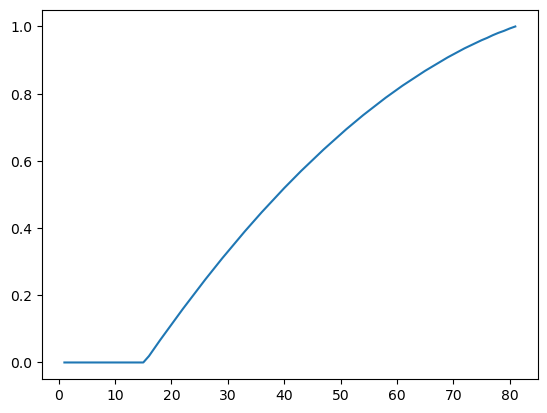

In [26]:
plt.plot(vct['level'],vct['vct_b'])